In [1]:
import torch
import os
from pathlib import Path
from networks.mrnet import MRFactory
from datasets.sampler import make2Dcoords
import yaml
from yaml.loader import SafeLoader
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
os.environ["WANDB_NOTEBOOK_NAME"] = "eval-net.ipynb"
BASE_DIR = Path('.').absolute().parents[0]
IMAGE_PATH = BASE_DIR.joinpath('img')
MODEL_PATH = BASE_DIR.joinpath('models')

In [3]:
project_name = "test_eval"
with open('../configs/config_base_m_net.yml') as f:
    hyper = yaml.load(f, Loader=SafeLoader)


In [4]:
mrmodel = MRFactory.load_state_dict(
    os.path.join(MODEL_PATH,
                 'MGchec_louco_3-3_w16T_hf289_MEp2000_hl1_256px.pth'))
                 #"MGalbe_2m_3-3_w16T_hf289_MEp2000_hl1_256px.pth"))
                 #"MGchec_P_3-3_w16T_hf289_MEp2000_hl1_256px.pth"))

In [5]:
print("Model: ", type(mrmodel))

Model:  <class 'networks.mrnet.MNet'>


In [6]:
for p in mrmodel.parameters():
    print("p: ", p.shape, " = ", p.numel())
total_params = sum(p.numel() for p in mrmodel.parameters()) - mrmodel.n_stages()
print("TOTAL = ", total_params)
print("MODEL TOTAL = ", mrmodel.total_parameters())

p:  torch.Size([25, 2])  =  50
p:  torch.Size([25])  =  25
p:  torch.Size([25, 25])  =  625
p:  torch.Size([25])  =  25
p:  torch.Size([1, 25])  =  25
p:  torch.Size([1])  =  1
p:  torch.Size([81, 2])  =  162
p:  torch.Size([81])  =  81
p:  torch.Size([81, 106])  =  8586
p:  torch.Size([81])  =  81
p:  torch.Size([1, 81])  =  81
p:  torch.Size([1])  =  1
p:  torch.Size([289, 2])  =  578
p:  torch.Size([289])  =  289
p:  torch.Size([289, 370])  =  106930
p:  torch.Size([289])  =  289
p:  torch.Size([1, 289])  =  289
p:  torch.Size([1])  =  1
TOTAL =  118116
MODEL TOTAL =  118116


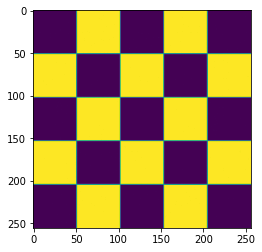

In [7]:
output = mrmodel(make2Dcoords(256,256))
model_out = torch.clamp(output['model_out'], 0.0, 1.0)

plt.imshow(model_out.cpu().view(256,256).detach().numpy())


In [8]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [9]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [11]:
slider = widgets.FloatRangeSlider(
    value=[-1.0, 1.0],
    min=-7,
    max=7,
    step=0.1,
    description='Interval:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%')
)

model = mrmodel
res = 256
channels=1
def plot_model(interval):
    output = model(make2Dcoords(res, res, *interval))
    model_out = torch.clamp(output['model_out'], 0.0, 1.0)

    pixels = model_out.cpu().detach().view(res, res, channels).numpy()
    pixels = (pixels * 255).astype(np.uint8)
    if channels == 1:
        pixels = np.repeat(pixels, 3, axis=-1)
    return Image.fromarray(pixels)

interact(plot_model, interval=slider)

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Interval:', la…

<function __main__.plot_model(interval)>